In [8]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn 
import scipy
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

In [2]:
df=pd.read_csv("auto-mpg-limpio-imputado.csv")

In [6]:
data=df.copy()

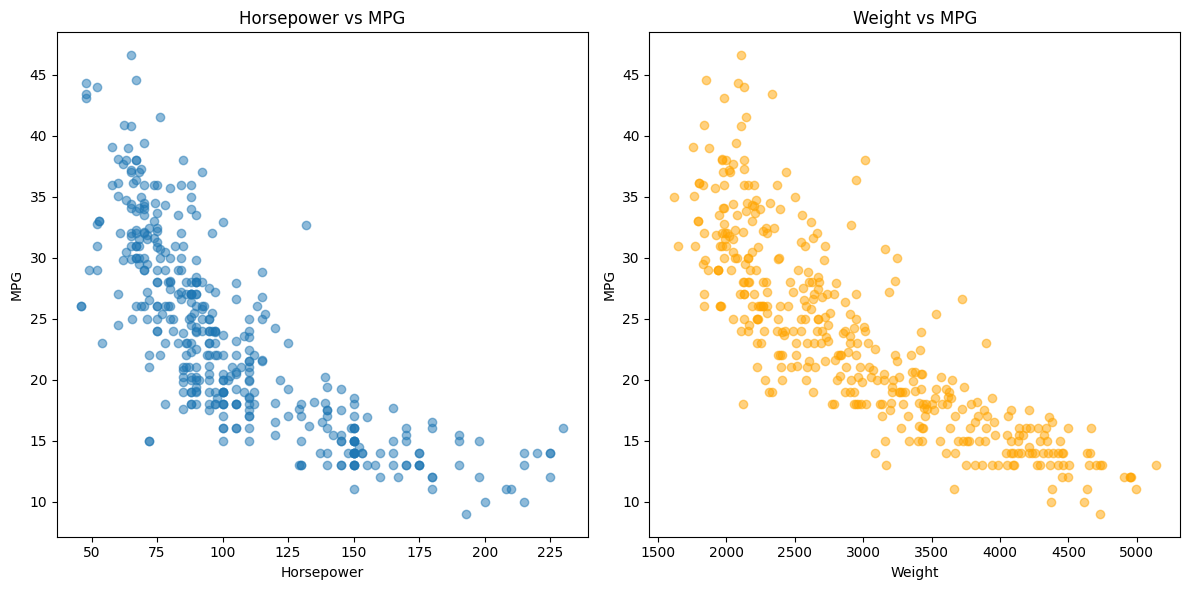

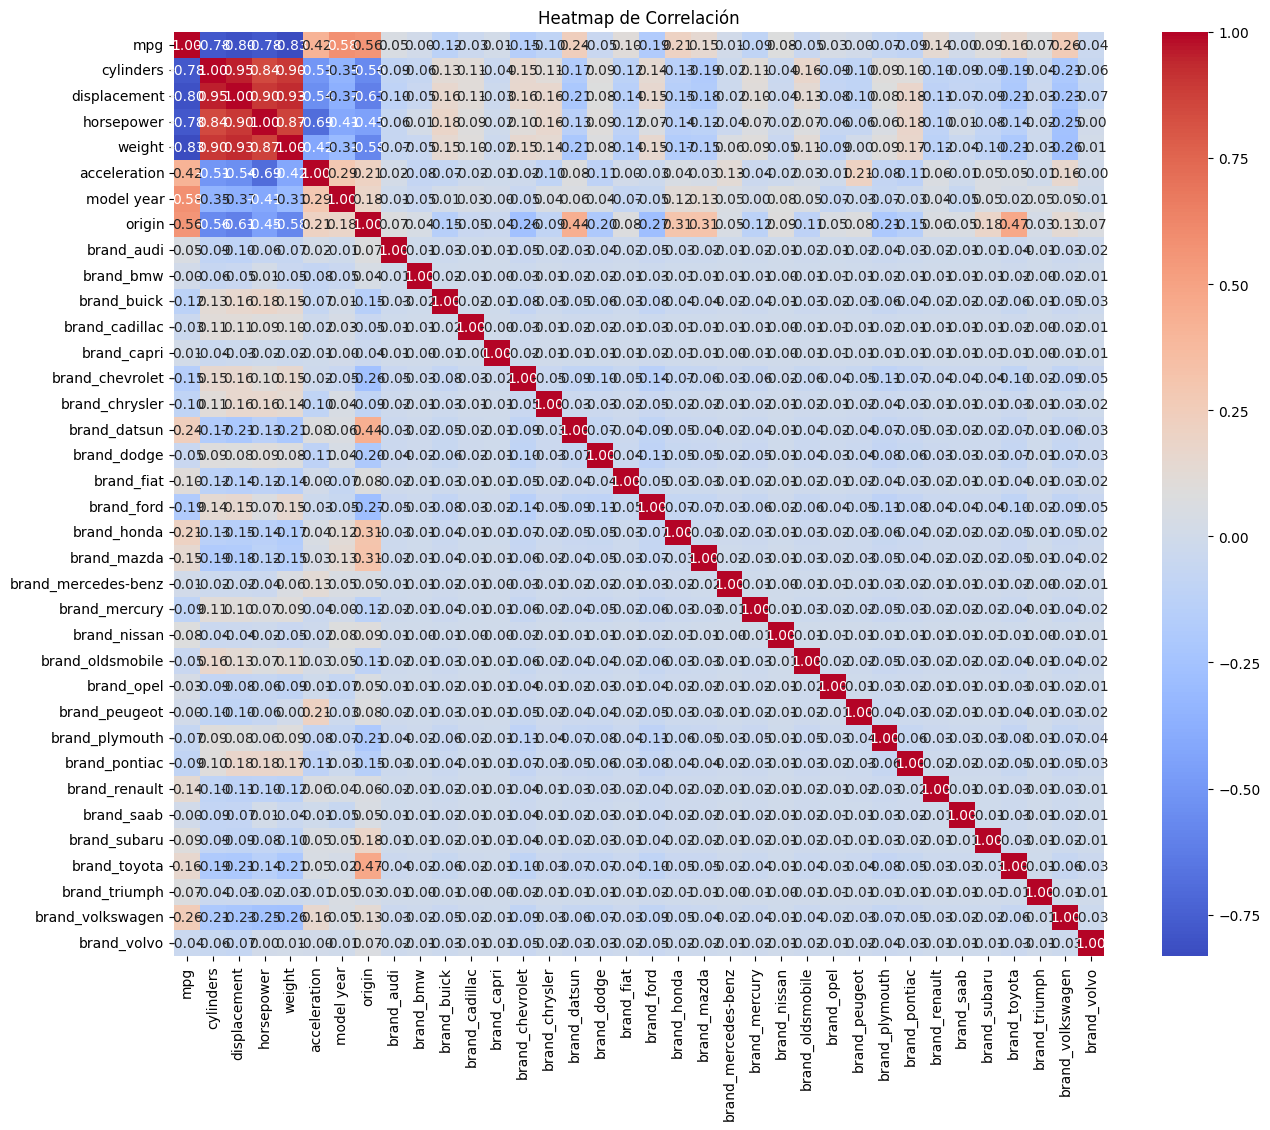

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data['horsepower'], data['mpg'], alpha=0.5)
plt.title('Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')

plt.subplot(1, 2, 2)
plt.scatter(data['weight'], data['mpg'], alpha=0.5, color='orange')
plt.title('Weight vs MPG')
plt.xlabel('Weight')
plt.ylabel('MPG')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 12))

correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Correlación')
plt.show()

In [20]:
X = data.drop('mpg', axis=1) 
y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_regresion_lineal = LinearRegression()
model_regresion_lineal.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

Mean Absolute Error (MAE): 2.7224
Mean Squared Error (MSE): 11.4034
Root Mean Squared Error (RMSE): 3.3769
R-squared (R2): 0.8013


## Vamos a probar quitando las columnas de brand pues igual me estan viciando el modelo 

In [26]:
data_sin_brand = data.drop([col for col in data.columns if col.startswith('brand_')], axis=1)


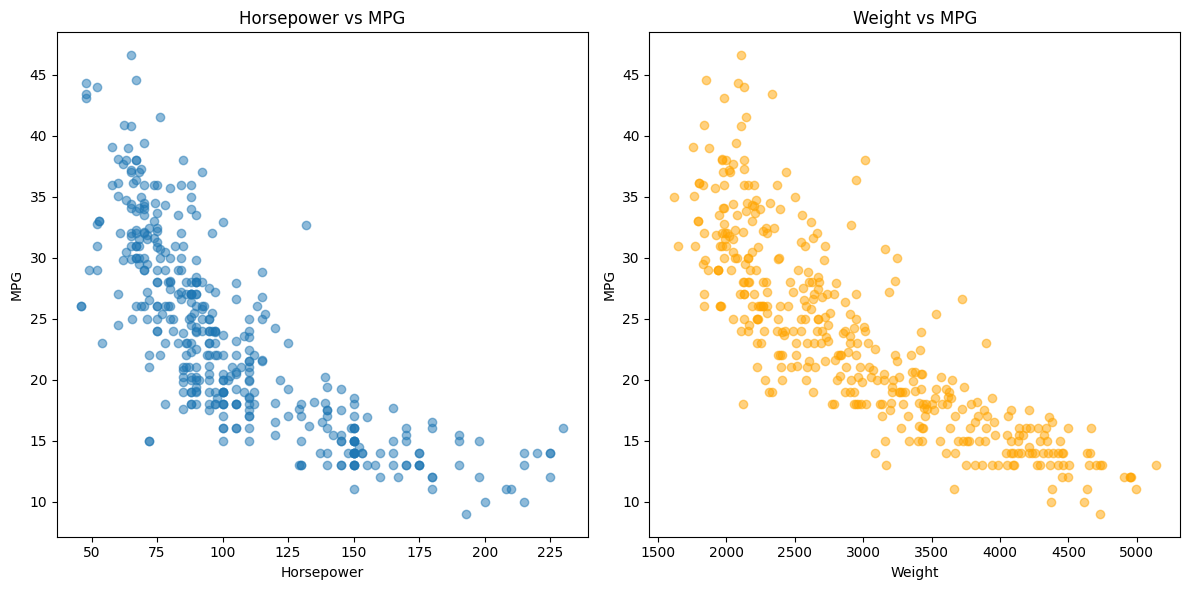

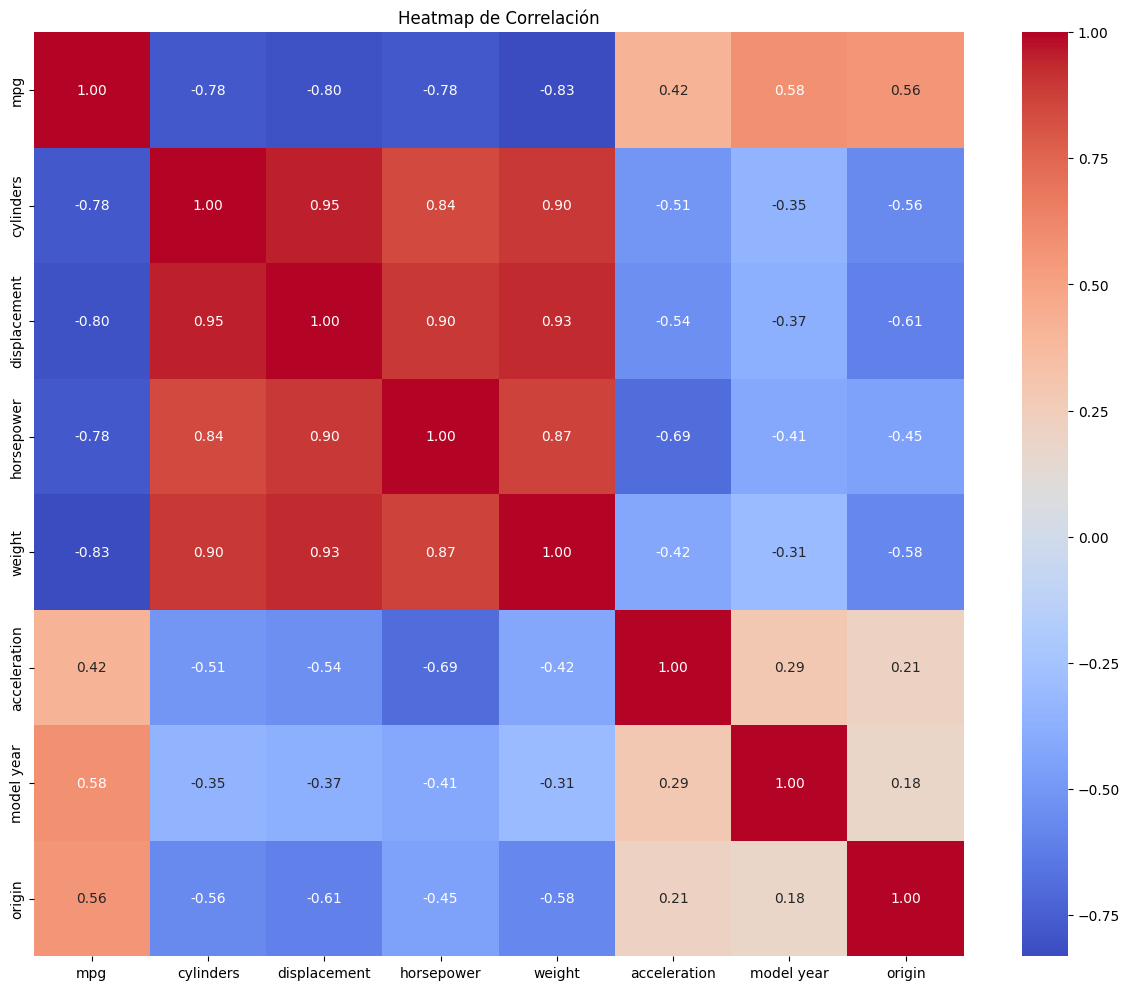

In [28]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_sin_brand['horsepower'], data_sin_brand['mpg'], alpha=0.5)
plt.title('Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')

plt.subplot(1, 2, 2)
plt.scatter(data_sin_brand['weight'], data_sin_brand['mpg'], alpha=0.5, color='orange')
plt.title('Weight vs MPG')
plt.xlabel('Weight')
plt.ylabel('MPG')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 12))

correlation_matrix = data_sin_brand.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Correlación')
plt.show()

In [24]:
X = data_sin_brand.drop('mpg', axis=1) 
y = data_sin_brand['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_regresion_lineal = LinearRegression()
model_regresion_lineal.fit(X_train_scaled, y_train)

y_pred = model_regresion_lineal.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R2): {r2:.4f}')


Mean Absolute Error (MAE): 2.2561
Mean Squared Error (MSE): 8.2037
Root Mean Squared Error (RMSE): 2.8642
R-squared (R2): 0.8474


## Probamos Random Forest

In [30]:
X = data_sin_brand.drop('mpg', axis=1)  
y = data_sin_brand['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_random_forest = RandomForestRegressor(random_state=42)
model_random_forest.fit(X_train_scaled, y_train)

y_pred_rf = model_random_forest.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Absolute Error (MAE): {mae_rf:.4f}')
print(f'Random Forest - Mean Squared Error (MSE): {mse_rf:.4f}')
print(f'Random Forest - Root Mean Squared Error (RMSE): {rmse_rf:.4f}')
print(f'Random Forest - R-squared (R2): {r2_rf:.4f}')


Random Forest - Mean Absolute Error (MAE): 1.5991
Random Forest - Mean Squared Error (MSE): 4.5323
Random Forest - Root Mean Squared Error (RMSE): 2.1289
Random Forest - R-squared (R2): 0.9157


In [31]:
filename = 'random_forest_mpg_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model_random_forest, file)

print(f'Modelo guardado como {filename}')

Modelo guardado como random_forest_mpg_model.pkl


In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Guardar el scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [33]:
filename = 'lineal_regresion_mpg_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model_regresion_lineal, file)

print(f'Modelo guardado como {filename}')

Modelo guardado como lineal_regresion_mpg_model.pkl
